In [105]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [106]:
img = cv2.imread('test2.png')
img_b, img_g, img_r = cv2.split(img[:,:,:3])
img_a = np.ones(img.shape[0:2], np.uint8) * 50
img_bgra = cv2.merge((img_b, img_g, img_r, img_a))

In [107]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)

In [108]:
img_otsu_bgr = cv2.cvtColor(img_otsu, cv2.COLOR_GRAY2BGR)

In [109]:
ch_b, ch_g, ch_r = cv2.split(img_otsu_bgr[:,:,:3])

In [110]:
ch_b = np.zeros(img.shape[0:2], np.uint8)
ch_r = np.zeros(img.shape[0:2], np.uint8)

In [111]:
ch_a = (ch_g / 255 * 128).astype('u1') #np.ones(img.shape[0:2], np.uint8) * 100

In [112]:
ch_g

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

In [113]:
ch_a

array([[128, 128, 128, ...,   0,   0,   0],
       [128, 128, 128, ...,   0,   0,   0],
       [128, 128, 128, ...,   0,   0,   0],
       ...,
       [128, 128, 128, ...,   0,   0,   0],
       [128, 128, 128, ...,   0,   0,   0],
       [128, 128, 128, ...,   0,   0,   0]], dtype=uint8)

In [114]:
dst = cv2.merge((ch_b, ch_g, ch_r, ch_a))

In [115]:
ch_w = np.ones(img.shape[0:2], np.uint8) * 255
white = cv2.merge((ch_w, ch_w, ch_w, ch_w))

In [116]:
pil_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA))
pil_white = Image.fromarray(cv2.cvtColor(white, cv2.COLOR_BGRA2RGBA))
pil_dst = Image.fromarray(cv2.cvtColor(dst, cv2.COLOR_BGRA2RGBA))

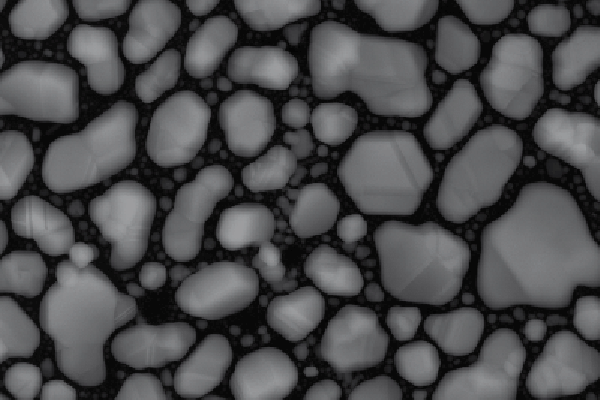

In [117]:
pil_img

In [118]:
print("モード", pil_img.mode)

モード RGBA


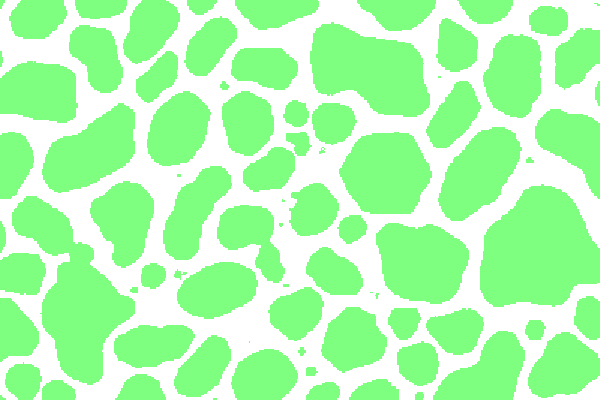

In [119]:
pil_dst

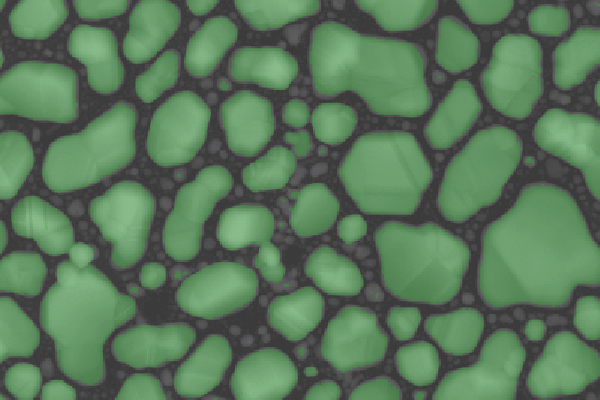

In [126]:
mask = Image.new("L", pil_dst.size, 200)


# 透けない背景画像に半スケを貼る
im = Image.composite(pil_img, pil_dst, mask)
im

In [121]:
show = white/100 + dst

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


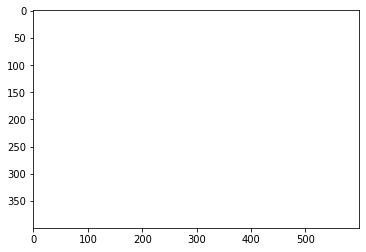

In [122]:
plt.imshow(show)